In [1]:
from keras.applications import inception_v3
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.preprocessing import image
K.set_learning_phase(0)

/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/keras/backend.py:400: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [70]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np
import os

In [3]:
from yield_gen import * 

In [4]:
# load generator 
# test on inceptionv3 
# build a pipeline 

In [5]:
docs()



    * functions
        - generator() : arguments gen_type = ( with-aug | with-augmentation ) & host = ( local | colab )

    * usage 
    
        from yield_gen import * 
        train, valid, test = generator(gen_type="with-aug", host="colab") # returns a tf.generator object with data

    * requirements
    
        - local data directory structure
            ./plant-data
                /Train
                    /Train
                        ..samples
                /Test
                    /Test
                        ..samples 
                /Validation
                    /Validation
                        ..samples
        
        - Colab data directory structure 
            ./drive
                ./MyDrive
                    /plant-data
                        /Train
                            /Train
                                ..samples
                        /Test
                            /Test
                                ..samples 
             

In [6]:
 train, valid, test = generator(gen_type="without-aug", host="local")

Local Paths Returned
Found 1322 images belonging to 3 classes.
Found 105 images belonging to 3 classes.
Found 105 images belonging to 3 classes.


In [21]:
# model paths 
path = 'Grid-Eval/Models/'
models = os.listdir(path)
try:
    models.remove('.DS_Store')
except:
    pass

In [22]:
models

['DenseNet121.h5',
 'VGG16.h5',
 'InceptionV3.h5',
 'MobileNetV2.h5',
 'Xception.h5',
 'VGG19.h5']

In [16]:
testx, testy = next(train)

In [279]:
import tensorflow 
from tensorflow.keras.applications import inception_v3, vgg16, vgg19, xception, mobilenet_v2, densenet
from tensorflow.keras.applications import InceptionV3, VGG16, VGG16, Xception, MobileNetV2, DenseNet121

In [191]:
modelobjs = [inception_v3, vgg16, vgg19, xception, mobilenet_v2,densenet]

In [280]:
modelfuncs = [InceptionV3, VGG16, VGG19, Xception, MobileNetV2, DenseNet121]

In [33]:
classes = list(test.class_indices.keys())
classes

['Healthy', 'Powdery', 'Rust']

In [64]:
def preview(img_arr,label):
    classes = ['Healthy', 'Powdery', 'Rust']
    plt.figure(figsize=(5,10))
    plt.imshow(img_arr)
    plt.grid = False
    plt.title(classes[label.argmax()],size=20)
    plt.show()

index: 12


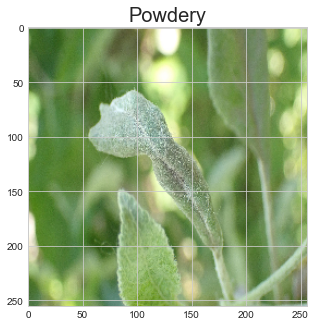

In [65]:
idx = int(input('index: '))
preview(testx[idx],testy[idx])

In [79]:
# image paths 
img_paths = train.filepaths

In [80]:
img_paths[:5]

['./plant-data/Train/Train/Healthy/800edef467d27c15.jpg',
 './plant-data/Train/Train/Healthy/801d6dcd96e48ebc.jpg',
 './plant-data/Train/Train/Healthy/802b59956a7aa5e7.jpg',
 './plant-data/Train/Train/Healthy/803bcb65f486e39a.jpg',
 './plant-data/Train/Train/Healthy/803e60cf3c64e1fe.jpg']

In [172]:
models

['DenseNet121.h5',
 'VGG16.h5',
 'InceptionV3.h5',
 'MobileNetV2.h5',
 'Xception.h5',
 'VGG19.h5']

In [260]:
# test 
model = xception.Xception(weights='imagenet',include_top=True)

In [261]:
from PIL import Image
def preprocess(image_path,shape,model):
    img = Image.open(image_path)
    img = img.resize(shape)
    
    #convert single image to a batch with 1 image
    img = np.array(img)
    img_arr = np.reshape(img, (-1,*shape,3))
    img_arr = model.preprocess_input(img_arr)
    
    # preview 
    label = image_path.split('/')[-2:][0]
    plt.figure(figsize=(5,10))
    plt.imshow(img)
    plt.grid = False
    plt.title(label,size=20)
    plt.show()
    
    return img_arr


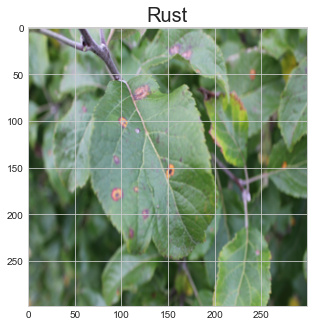

buckeye 0.39315853
hip 0.1504799
acorn 0.109499216
walking_stick 0.05220312
cucumber 0.032194354


In [262]:
img = preprocess(img_paths[1200],shape=(299,299),model=xception)
preds = model.predict(img)
for n, label, prob in decode_predictions(preds)[0]:
    print (label, prob)

### pipeline

In [ ]:
# img_paths[:458] # healthy
# img_paths[458:888] # Powdery
# img_paths[888:] # Rust 

In [265]:
healthy = img_paths[200]
powdery = img_paths[523]
rust = img_paths[912]

In [ ]:
# inception - 299, 299
# mobilenet - 224, 224
# densenet - 224, 224
# vgg16 - 224, 224
# vgg19 - 224, 224
# exception - 299,299


In [241]:
# dictionary of shapes 
shape_dict = {"inception_v3": (299,299), 
             "xception": (299,299)}
# model objects
modelobjs

[<module 'tensorflow.keras.applications.inception_v3' from '/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/keras/applications/inception_v3/__init__.py'>,
 <module 'tensorflow.keras.applications.vgg16' from '/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/keras/applications/vgg16/__init__.py'>,
 <module 'tensorflow.keras.applications.vgg19' from '/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/keras/applications/vgg19/__init__.py'>,
 <module 'tensorflow.keras.applications.xception' from '/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/keras/applications/xception/__init__.py'>,
 <module 'tensorflow.keras.applications.mobilenet_v2' from '/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/keras/applications/mobilenet_v2/__init__.py'>,
 <module 'tensorflow.keras.applications.densenet' from '/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/keras/applications/densenet/__init__.py'>]

In [252]:
# model annots 
model_dict = {}

for model in modelobjs:
    print(model)
    name = input('Enter Name: ')
    model_dict[name] = model


<module 'tensorflow.keras.applications.inception_v3' from '/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/keras/applications/inception_v3/__init__.py'>
Enter Name: Inception_v3
<module 'tensorflow.keras.applications.vgg16' from '/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/keras/applications/vgg16/__init__.py'>
Enter Name: VGG16
<module 'tensorflow.keras.applications.vgg19' from '/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/keras/applications/vgg19/__init__.py'>
Enter Name: VGG19
<module 'tensorflow.keras.applications.xception' from '/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/keras/applications/xception/__init__.py'>
Enter Name: Xception
<module 'tensorflow.keras.applications.mobilenet_v2' from '/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/keras/applications/mobilenet_v2/__init__.py'>
Enter Name: Mobilenet_v2
<module 'tensorflow.keras.applications.densenet' from '/Users/rohan/opt/an

In [281]:
modelfuncs

[<function tensorflow.python.keras.applications.inception_v3.InceptionV3(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax')>,
 <function tensorflow.python.keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax')>,
 <function tensorflow.python.keras.applications.vgg19.VGG19(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax')>,
 <function tensorflow.python.keras.applications.xception.Xception(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax')>,
 <function tensorflow.python.keras.applications.mobilenet_v2.MobileNetV2(input_shape=None, alpha=1.0, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000, cl

In [283]:
modelfunc_dict = {}
for modelobj, modelfunc in zip(modelobjs, modelfuncs):
    modelfunc_dict[modelobj] = modelfunc

In [285]:
# modelfunc_dict

Inception_v3
Powdery


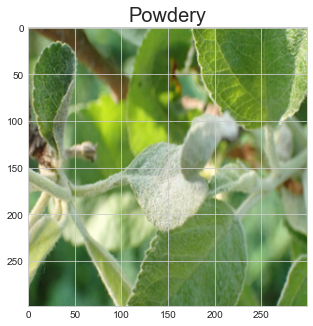

fig 0.5698928
acorn 0.10151443
leaf_beetle 0.07408586
hip 0.02261563
ladybug 0.021132195
--------------------------------------------------
Rust


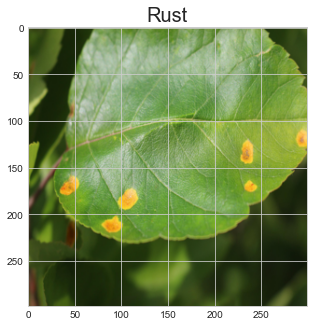

leaf_beetle 0.645243
ladybug 0.16257818
harvestman 0.024459325
leafhopper 0.014999165
hip 0.0042034695
--------------------------------------------------
Healthy


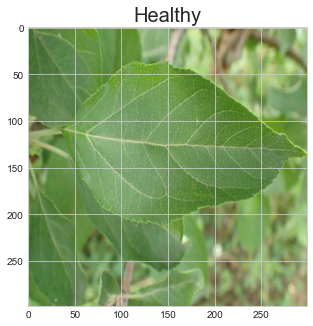

fig 0.9362877
custard_apple 0.009607057
acorn 0.007950285
jackfruit 0.0064856485
bell_pepper 0.0041211727
--------------------------------------------------
VGG16
Powdery


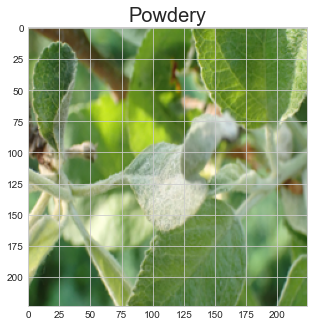

fig 0.29660797
acorn 0.24081676
hip 0.10485998
ladybug 0.051359124
cucumber 0.039073903
--------------------------------------------------
Rust


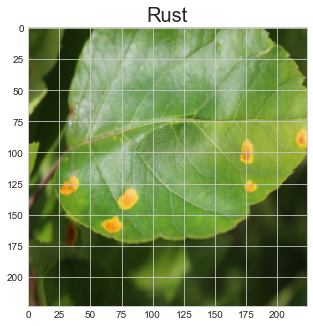

ladybug 0.23865592
leaf_beetle 0.16605492
fig 0.0664552
cicada 0.06197792
acorn 0.061614066
--------------------------------------------------
Healthy


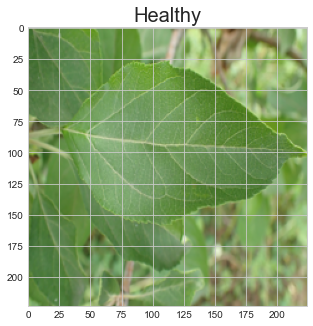

fig 0.31240177
custard_apple 0.1026009
bell_pepper 0.09625327
acorn 0.048927173
leaf_beetle 0.030139161
--------------------------------------------------
VGG19
Powdery


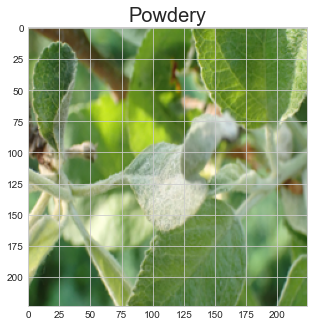

fig 0.15919724
leaf_beetle 0.1263598
ladybug 0.12074725
acorn 0.10706922
hip 0.071546175
--------------------------------------------------
Rust


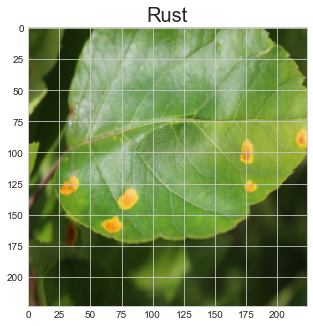

acorn 0.19343689
fig 0.18675399
ladybug 0.062861905
buckeye 0.062670834
hip 0.044397958
--------------------------------------------------
Healthy


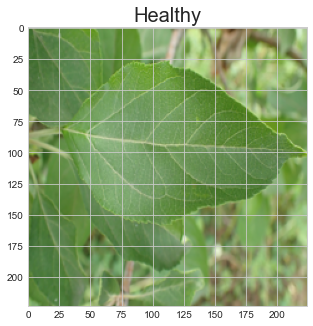

fig 0.17885065
bell_pepper 0.082901455
artichoke 0.05390492
acorn 0.046013538
buckeye 0.04126828
--------------------------------------------------
Xception
Powdery


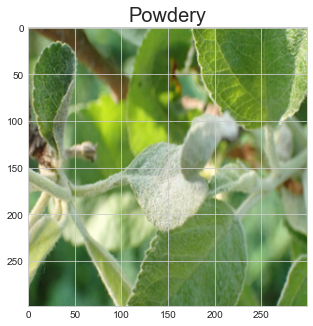

fig 0.29404268
acorn 0.25236818
leaf_beetle 0.08337873
ladybug 0.03758559
artichoke 0.028000424
--------------------------------------------------
Rust


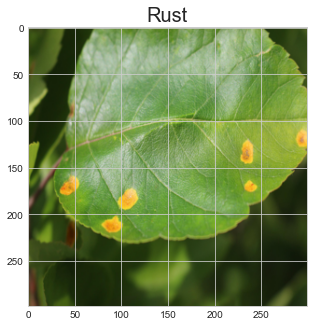

acorn 0.56679374
fig 0.03285673
buckeye 0.029331855
walking_stick 0.015129043
harvestman 0.012843059
--------------------------------------------------
Healthy


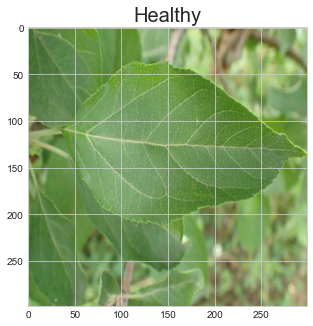

fig 0.8293204
acorn 0.03357124
pot 0.01091807
head_cabbage 0.0068430183
custard_apple 0.0055988277
--------------------------------------------------
Mobilenet_v2
Powdery


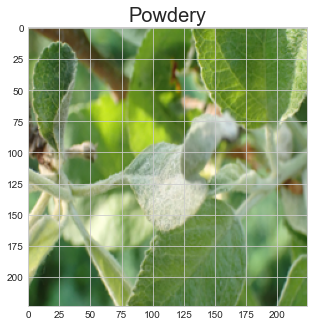

fig 0.33019087
acorn 0.089476146
pot 0.052955482
custard_apple 0.035619333
chainlink_fence 0.033503573
--------------------------------------------------
Rust


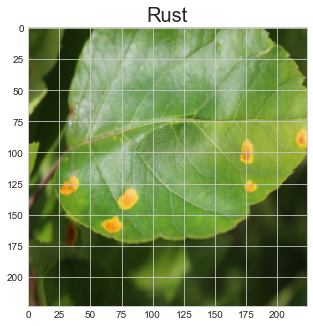

acorn 0.13308845
leaf_beetle 0.066688664
harvestman 0.031747065
fig 0.02903003
pot 0.026157344
--------------------------------------------------
Healthy


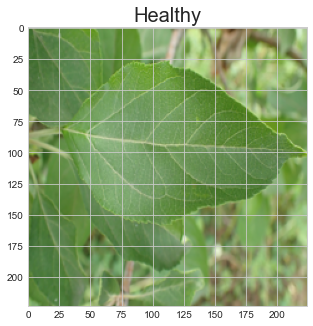

fig 0.29701173
pot 0.017047472
custard_apple 0.013166489
head_cabbage 0.011802623
harvestman 0.010424526
--------------------------------------------------
DenseNet121
Powdery


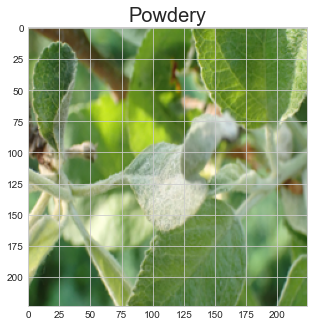

fig 0.12990521
bell_pepper 0.10458614
custard_apple 0.05811394
cabbage_butterfly 0.05677688
acorn 0.046302035
--------------------------------------------------
Rust


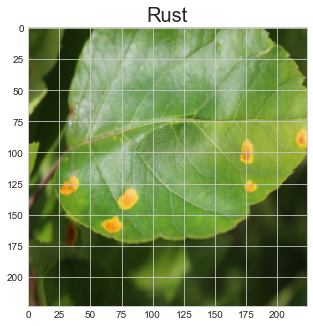

acorn 0.16874519
leaf_beetle 0.14329225
buckeye 0.13835613
sulphur_butterfly 0.069488406
ladybug 0.06262852
--------------------------------------------------
Healthy


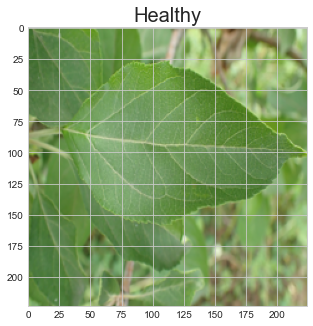

fig 0.2926892
bell_pepper 0.284255
custard_apple 0.09507094
acorn 0.05941399
buckeye 0.019260516
--------------------------------------------------
                                              Inception_v3  \
Powdery  {'acorn': 0.007950285, 'leaf_beetle': 0.645243...   
Rust     {'acorn': 0.007950285, 'leaf_beetle': 0.645243...   
Healthy  {'acorn': 0.007950285, 'leaf_beetle': 0.645243...   

                                                     VGG16  \
Powdery  {'acorn': 0.048927173, 'hip': 0.10485998, 'lad...   
Rust     {'acorn': 0.048927173, 'hip': 0.10485998, 'lad...   
Healthy  {'acorn': 0.048927173, 'hip': 0.10485998, 'lad...   

                                                     VGG19  \
Powdery  {'leaf_beetle': 0.1263598, 'ladybug': 0.062861...   
Rust     {'leaf_beetle': 0.1263598, 'ladybug': 0.062861...   
Healthy  {'leaf_beetle': 0.1263598, 'ladybug': 0.062861...   

                                                  Xception  \
Powdery  {'acorn': 0.03357124, 'leaf_beetle

In [342]:
report = {}

for name, modelobj in zip(model_dict.keys(), model_dict.values()):
    
    # nested dicts 
    category_dict = {}
    values = {}

    print(name)
    
    model = modelfunc_dict[modelobj](weights='imagenet',include_top=True)
    
    for category, cattype in zip([powdery, rust, healthy],['Powdery','Rust','Healthy']):
        print(cattype)
        img = preprocess(category, shape_dict.get(name.lower(), (224,224)), modelobj)
        preds = model.predict(img)
        
        for n, label, prob in decode_predictions(preds)[0]:
            print (label, prob)
            values[label] = prob
        
        print('-' * 50)
        try:
            values.pop('fig')
        except: 
            category_dict[cattype] = values
        else:
            category_dict[cattype] = values
        
       
    report[name] = category_dict
    


print(pd.DataFrame(report))
    
    
    
    

In [297]:
# nested Dict test
# report_dict = {"inception_v3" : {"powdery": {"pot": 0.017047472, "custurd_apple": 0.023, "leaves": 0.34}, 
#                                 "Rust": {"pot": 0.017047472, "custurd_apple": 0.023, "leaves": 0.34}, 
#                                 "Healthy": {"pot": 0.017047472, "custurd_apple": 0.023, "leaves": 0.34}}}

In [343]:
report

{'Inception_v3': {'Powdery': {'acorn': 0.007950285,
   'leaf_beetle': 0.645243,
   'hip': 0.0042034695,
   'ladybug': 0.16257818,
   'harvestman': 0.024459325,
   'leafhopper': 0.014999165,
   'custard_apple': 0.009607057,
   'jackfruit': 0.0064856485,
   'bell_pepper': 0.0041211727},
  'Rust': {'acorn': 0.007950285,
   'leaf_beetle': 0.645243,
   'hip': 0.0042034695,
   'ladybug': 0.16257818,
   'harvestman': 0.024459325,
   'leafhopper': 0.014999165,
   'custard_apple': 0.009607057,
   'jackfruit': 0.0064856485,
   'bell_pepper': 0.0041211727},
  'Healthy': {'acorn': 0.007950285,
   'leaf_beetle': 0.645243,
   'hip': 0.0042034695,
   'ladybug': 0.16257818,
   'harvestman': 0.024459325,
   'leafhopper': 0.014999165,
   'custard_apple': 0.009607057,
   'jackfruit': 0.0064856485,
   'bell_pepper': 0.0041211727}},
 'VGG16': {'Powdery': {'acorn': 0.048927173,
   'hip': 0.10485998,
   'ladybug': 0.23865592,
   'cucumber': 0.039073903,
   'leaf_beetle': 0.030139161,
   'cicada': 0.06197792,

In [344]:
imgnetdf = pd.DataFrame(report)

In [355]:
pd.DataFrame(report).to_csv('imagenet_precedence.csv')

In [348]:
imgnetdf

,Inception_v3,VGG16,VGG19,Xception,Mobilenet_v2,DenseNet121
Powdery,"{'acorn': 0.007950285, 'leaf_beetle': 0.645243...","{'acorn': 0.048927173, 'hip': 0.10485998, 'lad...","{'leaf_beetle': 0.1263598, 'ladybug': 0.062861...","{'acorn': 0.03357124, 'leaf_beetle': 0.0833787...","{'acorn': 0.13308845, 'pot': 0.017047472, 'cus...","{'bell_pepper': 0.284255, 'custard_apple': 0.0..."
Rust,"{'acorn': 0.007950285, 'leaf_beetle': 0.645243...","{'acorn': 0.048927173, 'hip': 0.10485998, 'lad...","{'leaf_beetle': 0.1263598, 'ladybug': 0.062861...","{'acorn': 0.03357124, 'leaf_beetle': 0.0833787...","{'acorn': 0.13308845, 'pot': 0.017047472, 'cus...","{'bell_pepper': 0.284255, 'custard_apple': 0.0..."
Healthy,"{'acorn': 0.007950285, 'leaf_beetle': 0.645243...","{'acorn': 0.048927173, 'hip': 0.10485998, 'lad...","{'leaf_beetle': 0.1263598, 'ladybug': 0.062861...","{'acorn': 0.03357124, 'leaf_beetle': 0.0833787...","{'acorn': 0.13308845, 'pot': 0.017047472, 'cus...","{'bell_pepper': 0.284255, 'custard_apple': 0.0..."
